In [66]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
from time import sleep 

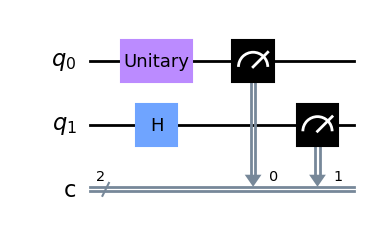

In [67]:
qc = QuantumCircuit(2,2)

qc.h(1)

pauli_x_matrix = [[0,1],[1,0]]  # defining a unitary matrix
pauli_x_gate = Operator(pauli_x_matrix) # constructing an operator using the unitary matrix
qc.unitary(pauli_x_gate, 0) #  applying the operator/ gate to the circuit

qc.measure(range(2), range(2))
qc.draw('mpl')

In [68]:
backend = Aer.get_backend('aer_simulator')
result = execute(qc, backend, shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)
counts

{'11': 1023, '01': 1025}

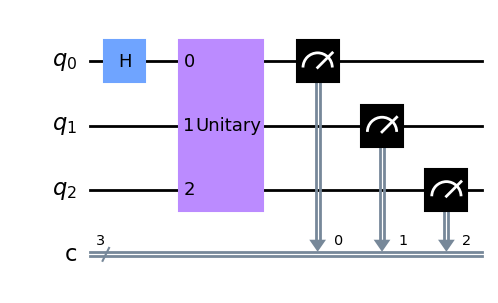

In [69]:
# Define the unitary operator matrix
U_mat = np.zeros((8, 8))

# Set the requisite elements to 1
U_mat[0][2] = 1
U_mat[1][1] = 1
U_mat[2][4] = 1
U_mat[3][6] = 1
U_mat[4][3] = 1
U_mat[5][7] = 1
U_mat[6][0] = 1
U_mat[7][5] = 1

# Define the unitary operator
U = Operator(U_mat)

qc_qw = QuantumCircuit(3,3)

qc_qw.h(0)

qc_qw.unitary(U, (range(3)))

qc_qw.measure(range(3), range(3))

qc_qw.draw('mpl')


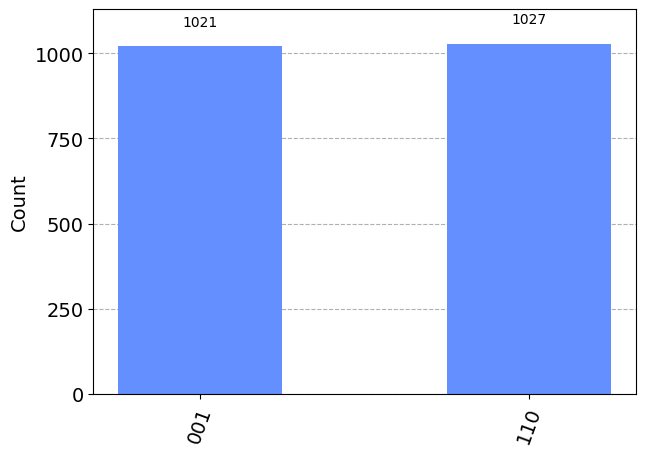

In [70]:
backend_qw = Aer.get_backend("aer_simulator")
result_qw = execute(qc_qw, backend_qw, shots=2048).result()
counts_qw = result_qw.get_counts()
plot_histogram(counts_qw)

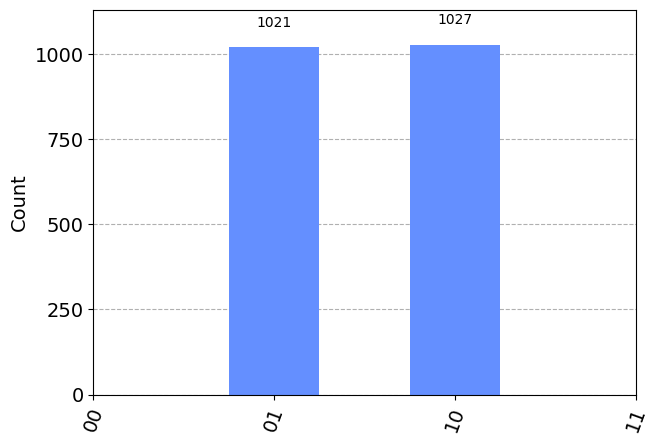

In [71]:
def dict3_to_dict2(dict3):
    counts_refined = {"00":0, "01":0, "10":0, "11":0}
    for key in dict3.keys():
        counts_refined[key[1:]] = dict3[key]
    return counts_refined

plot_histogram(dict3_to_dict2(counts_qw))

In [72]:
def dict3_to_state2(dict3):
    state2 = np.zeros(shape=(4,1))
    dict2 = dict3_to_dict2(dict3)
    for i, value in enumerate(dict2.values()):
        state2[i] = value
    vec_len = np.sqrt(state2[0]**2 + state2[1]**2 + state2[2]**2 + state2[3]**2)
    return state2/ vec_len

print(dict3_to_state2(counts_qw))


[[0.        ]
 [0.70503215]
 [0.70917534]
 [0.        ]]


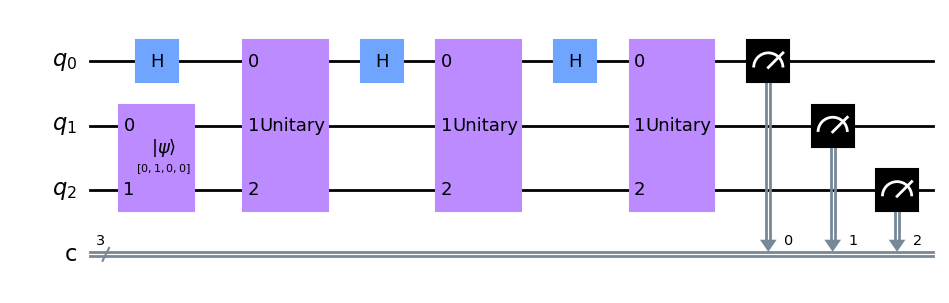

In [73]:
def step(init_state, U, N):
    # counts_arr = []
    qrw_circ = QuantumCircuit(3, 3)
    qrw_circ.initialize(init_state, [1, 2])
    
    for _ in range(N):
        qrw_circ.h(0)
        qrw_circ.unitary(U, range(3))
    
    qrw_circ.measure(range(3), range(3))
    
    return qrw_circ

qc_step_test = step([0,1,0,0], U_mat, 3)
qc_step_test.draw('mpl')

In [74]:
def quantum_random_walk(state, U, N, backend):
    count_array = []
    counts_dict = []
    for i in range(N):
        qrw_circ = step(state, U, i)
        step_count = execute(qrw_circ, backend, shots=2048).result().get_counts()
        count_array.append(dict3_to_state2(step_count))
        counts_dict.append(dict3_to_dict2(step_count))
    return count_array, counts_dict



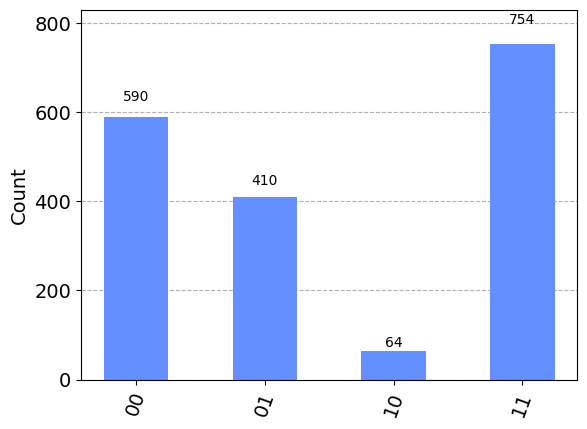

In [75]:
init_state = [1,0,0,0]
N = 10
qrw_backend = Aer.get_backend("aer_simulator")
counts_arr, counts_dict = quantum_random_walk(init_state, U_mat, N, qrw_backend)
fig, ax = plt.subplots()
for dictionary in counts_dict:
    ax.clear()
    plot_histogram(dictionary, ax=ax)
    display(fig)
    sleep(1)
    clear_output()

# Classical Coin Toss

In [76]:
def classical_coin_toss(x: int) -> int:
    step = np.random.binomial(n=1, p=0.5)
    if step==0:
        step = -1
    return np.mod(x + step,4)

In [77]:
def classical_random_walk(x: int, N: int):
    x_vec = np.zeros(4)
    for i in range(N):
        x = classical_coin_toss(x=x)
        x_vec[x] += 1
    return x_vec

In [78]:
count_arr_classical = classical_random_walk(x=0, N=100)

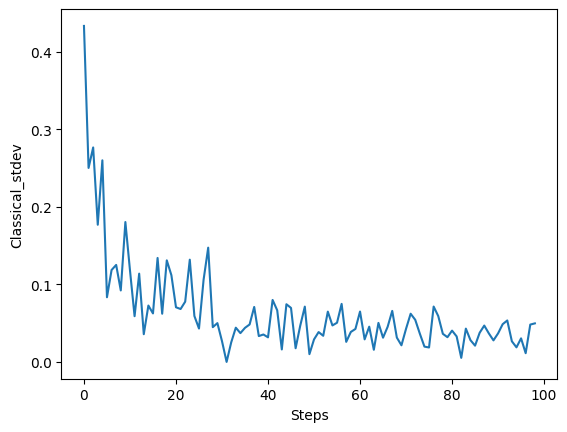

In [79]:
std_mat_classical = []
for i in range(1, 100):
    y = classical_random_walk(0, i)
    std_mat_classical.append(np.std(y/i))
plt.plot(std_mat_classical)
plt.xlabel('Steps')
plt.ylabel('Classical_stdev')
plt.show()

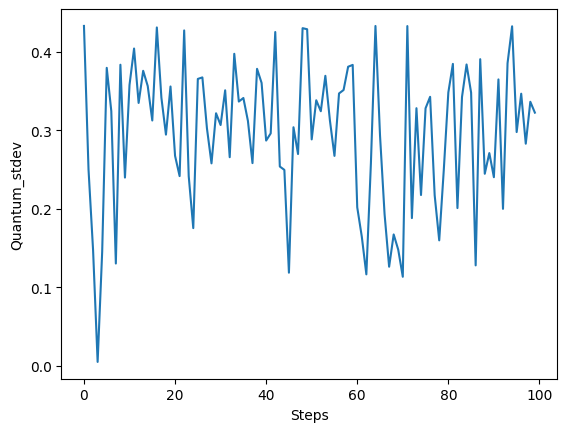

In [80]:
init_state = [1,0,0,0]
N = 100
qrw_backend = Aer.get_backend("aer_simulator")
counts_arr, _ = quantum_random_walk(init_state, U_mat, N, qrw_backend)
std_mat_quantum = np.std(np.square(counts_arr), axis=1)
plt.plot(std_mat_quantum)
plt.xlabel('Steps')
plt.ylabel('Quantum_stdev')
plt.show()
